##**1. Pinguins**

* Vou utilizar uma base de dados com informações sobre flores do gênero iris. A ideia é agrupar as flores de acordo com suas características físicas (variáveis preditivas).

##**O trabalho foi dividido em:**

* Tópicos;
* Agrupamento;
* Dados;
* Treino;
* Avaliação;
* Predição.

**1.1 Análise exploratória**

* Utilize os gráficos para entender melhor a relação entre os atributos da base de dados.

**Atributos preditivos**

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

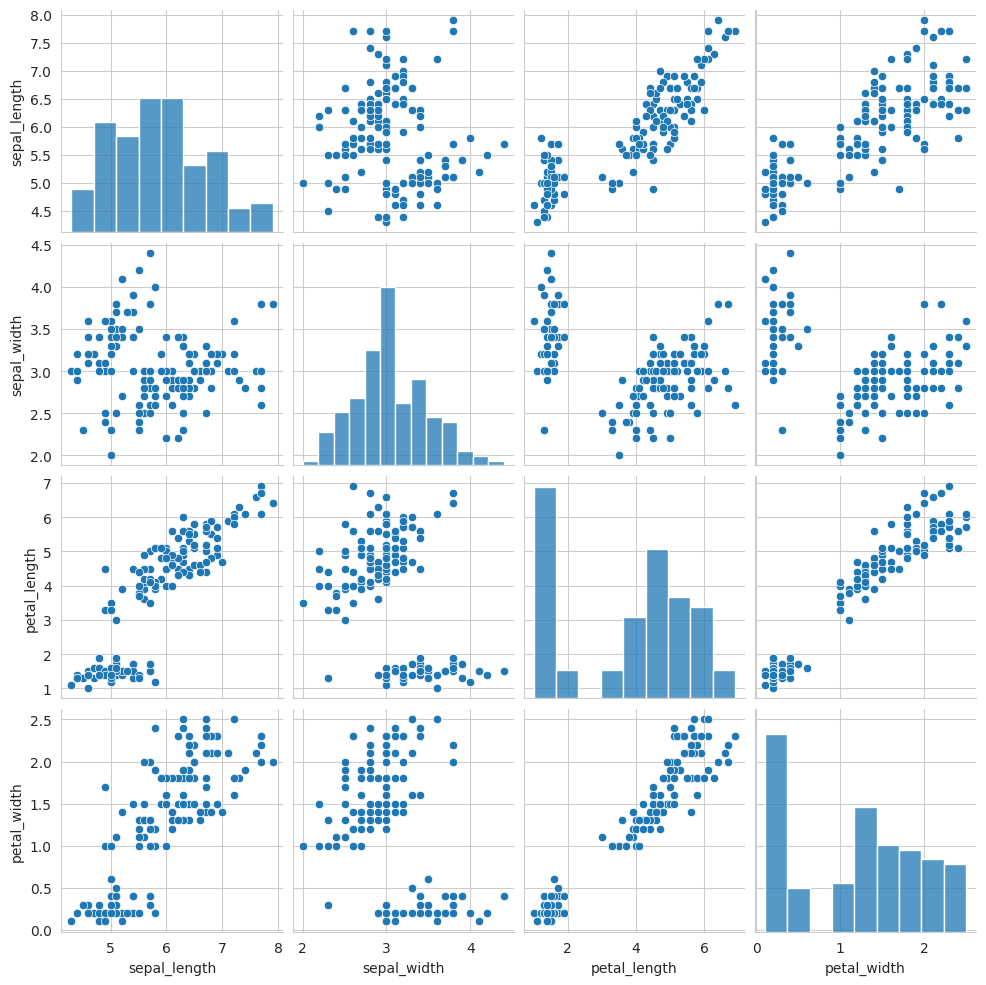

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

#**Insights**

* Este gráfico mostra as relações bivariadas entre cada par de características do conjunto de dados Iris. Cada ponto no gráfico representa uma observação no conjunto de dados e sua posição no eixo X e Y representa o valor de duas características diferentes. Isso permite visualizar a distribuição de uma única variável ao longo da diagonal e a relação bivariada entre pares de variáveis nas parcelas fora da diagonal.

#**2. Dados**

**2.1. Valores nulos**

* Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [ ]:
data = iris.fillna(iris.mean())

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* **2.2. Variáveis numéricas**

* Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna padronizando seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de “_std”.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números
codificador = LabelEncoder()

# só não aplicamos na coluna de que é o nosso objetivo
for coluna in iris.columns:
    if iris[coluna].dtype == "object" and coluna != "species":
        iris[coluna] = codificador.fit_transform(iris[coluna])
# verificando se realmente todas as colunas foram modificadas
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


**2.3. Limpeza**

* Descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo _std“, _nom” e “_ord”.

In [ ]:
# Removendo linhas com valores nulos
iris.dropna(inplace=True)

In [ ]:
# Verifique os valores ausentes
missing_values = iris.isnull().sum()
print("Valores ausentes no conjunto de dados:")
print(missing_values)

Valores ausentes no conjunto de dados:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [ ]:
 # Mostre o dataframe modificado
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


#**3. Modelagem**

**3.1. Treino**

* Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
from sklearn.cluster import KMeans

# Lista para armazenar os valores de WCSS
wcss = []

# Treinando os modelos de k-médias
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)

print(wcss)

[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.47223015873017, 39.03998724608726, 34.29971212121213, 30.06311061745273, 28.271721728563833, 26.09432474054042]


### **3.2. Avaliação**

* Gerando um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

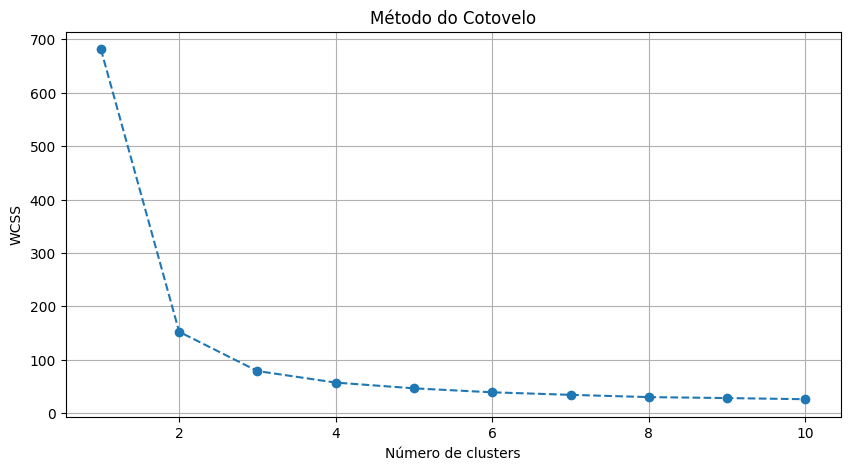

In [ ]:
import matplotlib.pyplot as plt

# Gerando o gráfico de linha
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### **3.3. Visualização**

* Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [ ]:
# Treinando o modelo de k-médias com o número ideal de clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(iris)

# Adicionando a coluna 'cluster' ao dataframe 'iris'
iris['cluster'] = kmeans.labels_

print(iris)

     sepal_length  sepal_width  petal_length  petal_width  cluster
0             5.1          3.5           1.4          0.2        3
1             4.9          3.0           1.4          0.2        3
2             4.7          3.2           1.3          0.2        3
3             4.6          3.1           1.5          0.2        3
4             5.0          3.6           1.4          0.2        3
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


* Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

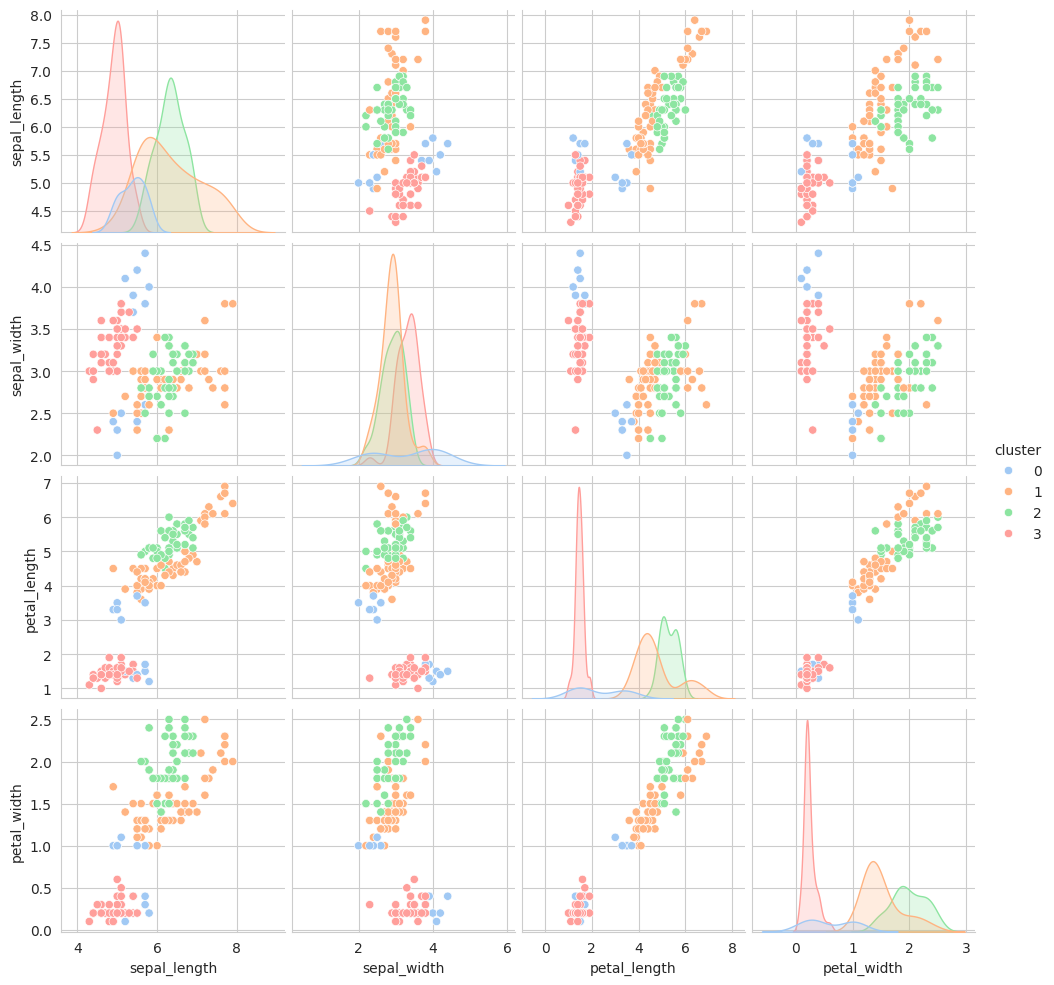

In [ ]:
import seaborn as sns

# Configurando o estilo do gráfico
with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=iris, hue='cluster', palette="pastel")

#**Insights**

* É necessário ver que as flores de cada cluster são bastante semelhantes entre si em termos das características medidas (comprimento e largura das pétalas e sépalas), e diferentes das flores dos outros clusters. Isso indicaria que o algoritmo de k-médias fez um bom trabalho em agrupar as flores de acordo com suas características. Se as flores de diferentes clusters parecem misturadas no gráfico, isso pode indicar que o número de clusters escolhido não foi adequado.

#**4. Predição**

**4.1. Nova flor**

* Em qual cluster a flor abaixo seria alocada?

| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

In [ ]:
new_iris = pd.DataFrame({
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2],
})

In [ ]:
from sklearn.preprocessing import LabelEncoder
# vai transformar as colunas de texto em números
codificador = LabelEncoder()

# só não aplicamos na coluna de species que é o nosso objetivo
for coluna in new_iris.columns:
    if new_iris[coluna].dtype == "object" and coluna != "species":
        new_iris[coluna] = codificador.fit_transform(new_iris[coluna])
# verificando se realmente todas as colunas foram modificadas
print(new_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  1 non-null      float64
 1   sepal_width   1 non-null      float64
 2   petal_length  1 non-null      float64
 3   petal_width   1 non-null      float64
dtypes: float64(4)
memory usage: 160.0 bytes
None


In [ ]:
# Supondo que 'new_iris' seja um DataFrame do pandas
new_iris['cluster'] = 0

# Agora você pode fazer a previsão
previsoes = kmeans_final.predict(new_iris)
print(f"A espécie cluster da íris é: {previsoes}")


A espécie cluster da íris é: [3]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Treinando o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(X_train, y_train)
# Obtenha a importância das características
colunas = iris.feature_names
importancia = pd.DataFrame(index=colunas, data=modelo_arvore.feature_importances_, columns=["Importância"])
importancia = importancia * 100
print(importancia)

                   Importância
sepal length (cm)     0.000000
sepal width (cm)      1.667014
petal length (cm)    90.614339
petal width (cm)      7.718647
